In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

# это чтобы графики строились непосредственно в блокноте iPython
%matplotlib inline 

df = pd.read_excel('cohort.xlsx')


In [2]:
df.head()

,Дата,Unnamed: 1,Пациент.Код,Unnamed: 3,Количество
0,01.01.2019,NaN,27915,NaN,1
1,01.01.2019,NaN,27915,NaN,1
2,02.01.2019,NaN,81127,NaN,1
3,02.01.2019,NaN,80936,NaN,1
4,02.01.2019,NaN,15318,NaN,1


In [3]:
# удаляю ненужные столбцы
del df['Unnamed: 1']
del df['Unnamed: 3']

In [4]:
df

,Дата,Пациент.Код,Количество
0,01.01.2019,27915,1
1,01.01.2019,27915,1
2,02.01.2019,81127,1
3,02.01.2019,80936,1
4,02.01.2019,15318,1
...,...,...,...
283281,30.11.2020,96835,1
283282,30.11.2020,96845,1
283283,30.11.2020,96845,1
283284,30.11.2020,96845,1


In [5]:
df.drop(df.tail(1).index,inplace=True) # удаляю итоговой столбец

In [6]:
df

,Дата,Пациент.Код,Количество
0,01.01.2019,27915,1
1,01.01.2019,27915,1
2,02.01.2019,81127,1
3,02.01.2019,80936,1
4,02.01.2019,15318,1
...,...,...,...
283280,30.11.2020,96835,1
283281,30.11.2020,96835,1
283282,30.11.2020,96845,1
283283,30.11.2020,96845,1


In [7]:
pd.to_datetime(df['Дата'], dayfirst=True) #необходимо что данные с датой были в формате даты

0        2019-01-01
1        2019-01-01
2        2019-01-02
3        2019-01-02
4        2019-01-02
            ...    
283280   2020-11-30
283281   2020-11-30
283282   2020-11-30
283283   2020-11-30
283284   2020-11-30
Name: Дата, Length: 283285, dtype: datetime64[ns]

In [8]:
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True)

In [9]:
df['Дата']

0        2019-01-01
1        2019-01-01
2        2019-01-02
3        2019-01-02
4        2019-01-02
            ...    
283280   2020-11-30
283281   2020-11-30
283282   2020-11-30
283283   2020-11-30
283284   2020-11-30
Name: Дата, Length: 283285, dtype: datetime64[ns]

In [10]:
df['Период заказа'] = df.Дата.apply(lambda x: x.strftime('%Y-%m')) #откидываем дни в дате
df.head()

,Дата,Пациент.Код,Количество,Период заказа
0,2019-01-01,27915,1,2019-01
1,2019-01-01,27915,1,2019-01
2,2019-01-02,81127,1,2019-01
3,2019-01-02,80936,1,2019-01
4,2019-01-02,15318,1,2019-01


In [11]:
df.set_index('Пациент.Код', inplace=True) #индексируем по id клиента
df.head()

,Дата,Количество,Период заказа
Пациент.Код,,,
27915,2019-01-01,1,2019-01
27915,2019-01-01,1,2019-01
81127,2019-01-02,1,2019-01
80936,2019-01-02,1,2019-01
15318,2019-01-02,1,2019-01


In [13]:
df['Период заказа'] = pd.to_datetime(df['Период заказа']) #трансформируем период в дату

In [14]:
df['Период заказа']

Пациент.Код
27915   2019-01-01
27915   2019-01-01
81127   2019-01-01
80936   2019-01-01
15318   2019-01-01
           ...    
96835   2020-11-01
96835   2020-11-01
96845   2020-11-01
96845   2020-11-01
96845   2020-11-01
Name: Период заказа, Length: 283285, dtype: datetime64[ns]

In [15]:
df['Присоединился'] = df.groupby(level=0)['Период заказа'].min().apply(lambda x: x.strftime('%Y-%m')) #добавим столбец Присоединился

In [16]:
df.reset_index(inplace=True) #переиндексируем df

In [17]:
df.insert(len(df.columns), "TotalOrders", 0, allow_duplicates=False) #создадим столбец в котором далее поместим количество заказов

In [18]:
df.head()

,Пациент.Код,Дата,Количество,Период заказа,Присоединился,TotalOrders
0,27915,2019-01-01,1,2019-01-01,2019-01,0
1,27915,2019-01-01,1,2019-01-01,2019-01,0
2,81127,2019-01-02,1,2019-01-01,2019-01,0
3,80936,2019-01-02,1,2019-01-01,2019-01,0
4,15318,2019-01-02,1,2019-01-01,2019-01,0


In [19]:
grouped = df.groupby(['Присоединился', 'Период заказа'])

In [20]:
# создаем когорту по месяцу присоединения
cohorts = grouped.agg({'Пациент.Код': pd.Series.nunique,
                       'TotalOrders': pd.Series.count, 
                       'Количество': np.sum})

In [21]:
cohorts.head()

Пациент.Код  TotalOrders  Количество
Присоединился Период заказа                                      
2019-01       2019-01-01            2203        10068      707884
              2019-02-01            1007         6709      558864
              2019-03-01             888         5765      703746
              2019-04-01             725         5113      640085
              2019-05-01             596         4058      605802

In [22]:
cohorts.rename(columns={'Пациент.Код': 'TotalUsers',
                        'TotalOrders': 'TotalOrders'}, inplace=True)

In [23]:
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

In [24]:
cohorts = cohorts.groupby(level=0).apply(cohort_period)

In [25]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['Присоединился','CohortPeriod'], inplace=True)

In [26]:
# создадим ряд содержаший размер каждой когорты Присоединился
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohorts['TotalUsers'].unstack(0)
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

In [27]:
cohorts

Период заказа  TotalUsers  TotalOrders  Количество
Присоединился CohortPeriod                                                   
2019-01       1               2019-01-01        2203        10068      707884
              2               2019-02-01        1007         6709      558864
              3               2019-03-01         888         5765      703746
              4               2019-04-01         725         5113      640085
              5               2019-05-01         596         4058      605802
...                                  ...         ...          ...         ...
2020-09       2               2020-10-01         216         1401        1799
              3               2020-11-01         136          679        1092
2020-10       1               2020-10-01         772         2877        3003
              2               2020-11-01         188         1166        1540
2020-11       1               2020-11-01         688         2746        2964

[276 rows x 4 columns]

In [28]:
cohorts['TotalUsers'].unstack(1).head(19)

CohortPeriod,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Присоединился,,,,,,,,,,,,,,,,,,,,,,,
2019-01,2203.0,1007.0,888.0,725.0,596.0,529.0,474.0,433.0,393.0,388.0,348.0,321.0,321.0,315.0,290.0,193.0,168.0,212.0,205.0,183.0,196.0,188.0,175.0
2019-02,1459.0,494.0,397.0,334.0,269.0,232.0,228.0,214.0,199.0,194.0,190.0,164.0,172.0,177.0,105.0,83.0,104.0,111.0,118.0,125.0,124.0,110.0,NaN
2019-03,1228.0,370.0,248.0,212.0,211.0,174.0,190.0,176.0,157.0,138.0,129.0,139.0,152.0,99.0,95.0,91.0,93.0,79.0,84.0,84.0,68.0,NaN,NaN
2019-04,1084.0,291.0,202.0,182.0,157.0,144.0,128.0,135.0,110.0,99.0,93.0,119.0,94.0,68.0,74.0,73.0,75.0,57.0,64.0,66.0,NaN,NaN,NaN
2019-05,863.0,214.0,157.0,138.0,128.0,139.0,115.0,109.0,82.0,99.0,99.0,58.0,63.0,68.0,76.0,68.0,76.0,65.0,57.0,NaN,NaN,NaN,NaN
2019-06,935.0,234.0,198.0,139.0,154.0,121.0,102.0,90.0,81.0,83.0,62.0,53.0,95.0,73.0,76.0,66.0,61.0,57.0,NaN,NaN,NaN,NaN,NaN
2019-07,937.0,228.0,141.0,136.0,120.0,96.0,85.0,96.0,104.0,71.0,59.0,87.0,89.0,83.0,67.0,67.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,966.0,247.0,186.0,155.0,138.0,94.0,75.0,92.0,66.0,51.0,67.0,74.0,89.0,98.0,76.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,820.0,226.0,123.0,109.0,79.0,74.0,63.0,47.0,49.0,61.0,59.0,59.0,98.0,76.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#определяем ретеншн - отток клиентов в рамках одной когорты по месяцу
user_retention = cohorts['TotalUsers'].unstack(1).divide(cohort_group_size, axis=0)
user_retention.head(19)

CohortPeriod,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Присоединился,,,,,,,,,,,,,,,,,,,,,,,
2019-01,1.0,0.457104,0.403087,0.329097,0.270540,0.240127,0.215161,0.196550,0.178393,0.176123,0.157966,0.145710,0.145710,0.142987,0.131639,0.087608,0.076260,0.096232,0.093055,0.083069,0.088970,0.085338,0.079437
2019-02,1.0,0.338588,0.272104,0.228924,0.184373,0.159013,0.156271,0.146676,0.136395,0.132968,0.130226,0.112406,0.117889,0.121316,0.071967,0.056888,0.071282,0.076080,0.080877,0.085675,0.084990,0.075394,NaN
2019-03,1.0,0.301303,0.201954,0.172638,0.171824,0.141694,0.154723,0.143322,0.127850,0.112378,0.105049,0.113192,0.123779,0.080619,0.077362,0.074104,0.075733,0.064332,0.068404,0.068404,0.055375,NaN,NaN
2019-04,1.0,0.268450,0.186347,0.167897,0.144834,0.132841,0.118081,0.124539,0.101476,0.091328,0.085793,0.109779,0.086716,0.062731,0.068266,0.067343,0.069188,0.052583,0.059041,0.060886,NaN,NaN,NaN
2019-05,1.0,0.247972,0.181924,0.159907,0.148320,0.161066,0.133256,0.126304,0.095017,0.114716,0.114716,0.067207,0.073001,0.078795,0.088065,0.078795,0.088065,0.075319,0.066049,NaN,NaN,NaN,NaN
2019-06,1.0,0.250267,0.211765,0.148663,0.164706,0.129412,0.109091,0.096257,0.086631,0.088770,0.066310,0.056684,0.101604,0.078075,0.081283,0.070588,0.065241,0.060963,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.243330,0.150480,0.145144,0.128068,0.102455,0.090715,0.102455,0.110993,0.075774,0.062967,0.092850,0.094984,0.088581,0.071505,0.071505,0.062967,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.255694,0.192547,0.160455,0.142857,0.097308,0.077640,0.095238,0.068323,0.052795,0.069358,0.076605,0.092133,0.101449,0.078675,0.069358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.275610,0.150000,0.132927,0.096341,0.090244,0.076829,0.057317,0.059756,0.074390,0.071951,0.071951,0.119512,0.092683,0.092683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['Присоединился','CohortPeriod'], inplace=True)

In [31]:
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohorts['TotalUsers'].unstack(0)
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

In [32]:
user_retention

Присоединился,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
CohortPeriod,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.457104,0.338588,0.301303,0.268450,0.247972,0.250267,0.243330,0.255694,0.275610,0.233211,0.233333,0.193750,0.298033,0.280313,0.218140,0.246418,0.284900,0.265460,0.239896,0.257660,0.289157,0.243523,NaN
3,0.403087,0.272104,0.201954,0.186347,0.181924,0.211765,0.150480,0.192547,0.150000,0.164835,0.129487,0.185938,0.210287,0.161669,0.128588,0.246418,0.190883,0.188537,0.183833,0.164345,0.182062,NaN,NaN
4,0.329097,0.228924,0.172638,0.167897,0.159907,0.148663,0.145144,0.160455,0.132927,0.133089,0.147436,0.148438,0.124054,0.122555,0.192882,0.212034,0.153846,0.167421,0.168188,0.126741,NaN,NaN,NaN
5,0.270540,0.184373,0.171824,0.144834,0.148320,0.164706,0.128068,0.142857,0.096341,0.113553,0.135897,0.087500,0.110439,0.142112,0.210103,0.200573,0.176638,0.155354,0.136897,NaN,NaN,NaN,NaN
6,0.240127,0.159013,0.141694,0.132841,0.161066,0.129412,0.102455,0.097308,0.090244,0.107448,0.073077,0.068750,0.119516,0.132986,0.159587,0.194842,0.131054,0.122172,NaN,NaN,NaN,NaN,NaN
7,0.215161,0.156271,0.154723,0.118081,0.133256,0.109091,0.090715,0.077640,0.076829,0.075702,0.065385,0.100000,0.121029,0.131682,0.150402,0.163324,0.091168,NaN,NaN,NaN,NaN,NaN,NaN
8,0.196550,0.146676,0.143322,0.124539,0.126304,0.096257,0.102455,0.095238,0.057317,0.061050,0.102564,0.090625,0.111952,0.122555,0.129736,0.126074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.178393,0.136395,0.127850,0.101476,0.095017,0.086631,0.110993,0.068323,0.059756,0.070818,0.087179,0.076563,0.119516,0.104302,0.117107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


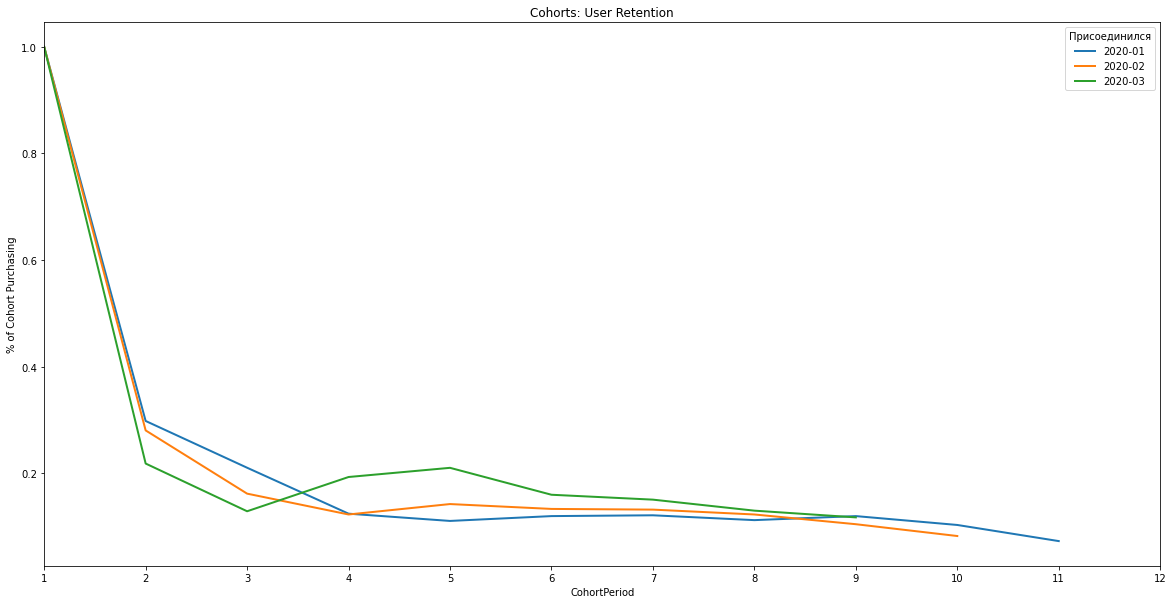

In [33]:
user_retention[['2020-01', '2020-02', '2020-03']].plot(figsize=(20,10))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1)) # разбивка оси X
plt.xlim(1, 12) #ось X
plt.ylabel('% of Cohort Purchasing');

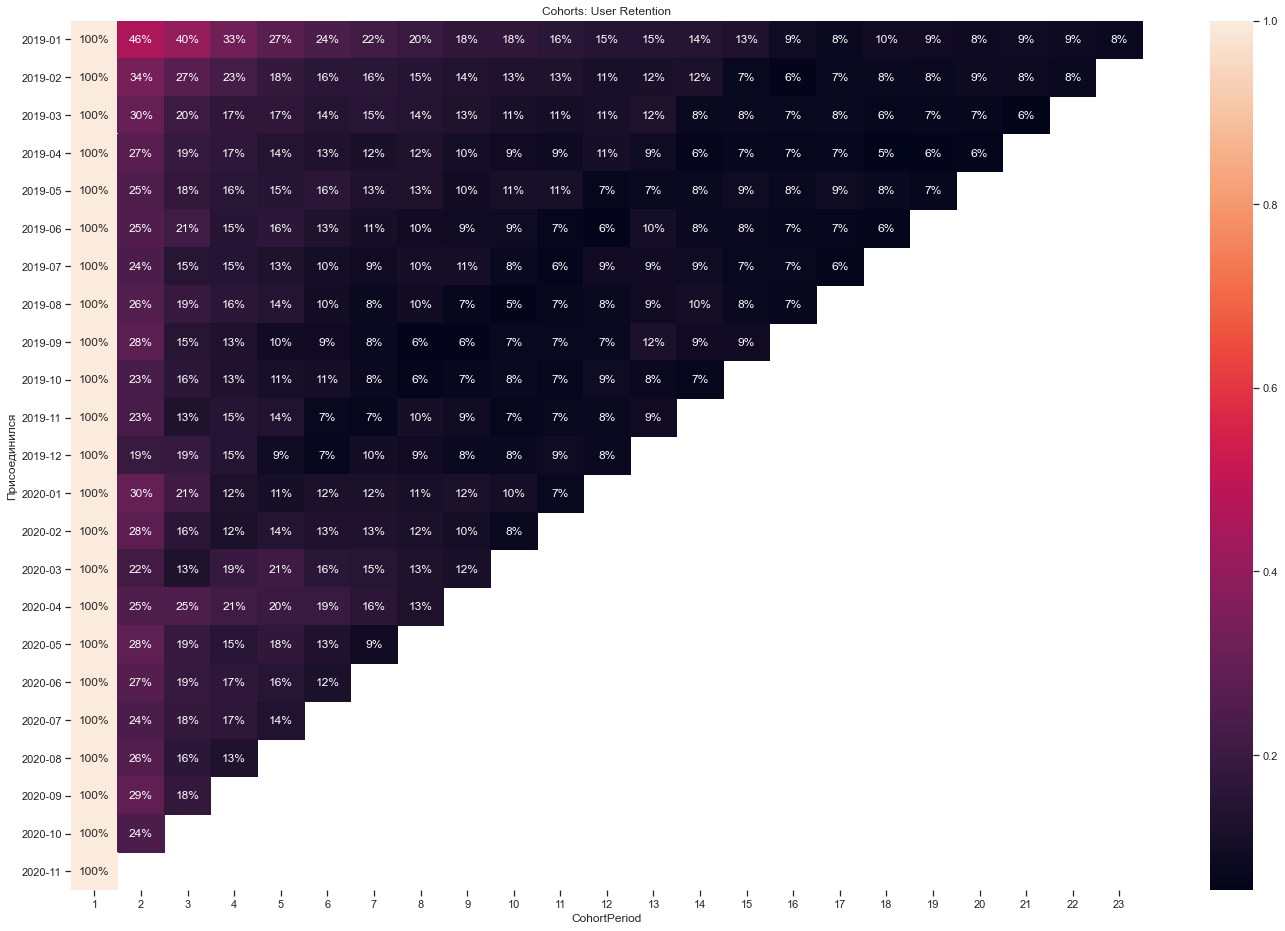

In [34]:
import seaborn as sns
sns.set(style='ticks')
plt.figure(figsize=(24, 16))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

In [35]:
cohorts

Период заказа  TotalUsers  TotalOrders  Количество
Присоединился CohortPeriod                                                   
2019-01       1               2019-01-01        2203        10068      707884
              2               2019-02-01        1007         6709      558864
              3               2019-03-01         888         5765      703746
              4               2019-04-01         725         5113      640085
              5               2019-05-01         596         4058      605802
...                                  ...         ...          ...         ...
2020-08       2               2020-09-01         185         1411        1707
              3               2020-10-01         118          732        1304
2020-09       1               2020-09-01         747         2633        2803
              2               2020-10-01         216         1401        1799
2020-10       1               2020-10-01         771         2876        3002

[253 rows x 4 columns]

In [36]:
cohorts['TotalOrders'].unstack(1).head(19)

CohortPeriod,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
Присоединился,,,,,,,,,,,,,,,,,,,,,,
2019-01,10068.0,6709.0,5765.0,5113.0,4058.0,3213.0,3115.0,2697.0,2382.0,2215.0,2130.0,1966.0,1914.0,2024.0,2064.0,1183.0,1204.0,1346.0,1292.0,1235.0,1323.0,1140.0
2019-02,5314.0,3200.0,2636.0,1685.0,1513.0,1325.0,1262.0,1192.0,1210.0,1218.0,1002.0,770.0,672.0,1094.0,679.0,549.0,742.0,682.0,677.0,815.0,613.0,NaN
2019-03,4257.0,2281.0,1471.0,1061.0,1101.0,965.0,1088.0,945.0,937.0,730.0,765.0,840.0,843.0,662.0,502.0,547.0,508.0,608.0,480.0,367.0,NaN,NaN
2019-04,4355.0,1678.0,1124.0,1033.0,861.0,907.0,600.0,654.0,578.0,533.0,419.0,770.0,476.0,347.0,516.0,595.0,332.0,372.0,491.0,NaN,NaN,NaN
2019-05,2734.0,1194.0,924.0,846.0,814.0,911.0,735.0,626.0,419.0,433.0,530.0,309.0,241.0,388.0,374.0,444.0,520.0,353.0,NaN,NaN,NaN,NaN
2019-06,3083.0,1447.0,1534.0,753.0,743.0,617.0,558.0,395.0,465.0,570.0,372.0,275.0,522.0,478.0,446.0,304.0,428.0,NaN,NaN,NaN,NaN,NaN
2019-07,3344.0,1488.0,1009.0,869.0,715.0,551.0,653.0,545.0,525.0,339.0,245.0,518.0,569.0,510.0,333.0,332.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,3233.0,1402.0,1220.0,770.0,607.0,498.0,457.0,438.0,323.0,226.0,361.0,379.0,567.0,495.0,374.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,2663.0,1352.0,667.0,462.0,461.0,409.0,408.0,216.0,187.0,326.0,301.0,290.0,422.0,406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
